## Setting up the tau

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [10, 12, 14, 15, 17, 19, 20, 22, 24, 25, 27, 29, 30, 32, 34, 35, 37, 39, 40, 42, 44, 45, 47]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [11, 13, 15, 17, 19, 20, 22, 24, 26, 28, 30, 31, 33, 35, 37, 39, 40, 42, 44, 46, 48, 50, 51]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [14, 16, 18, 20, 23, 25, 27, 29, 32, 34, 36, 38, 40, 43, 45, 47, 49, 52, 54, 56, 58, 60, 63]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [15, 18, 20, 23, 25, 28, 30, 33, 35, 38, 40, 43, 45, 48, 50, 53, 55, 58, 60, 63, 65, 68, 70]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,

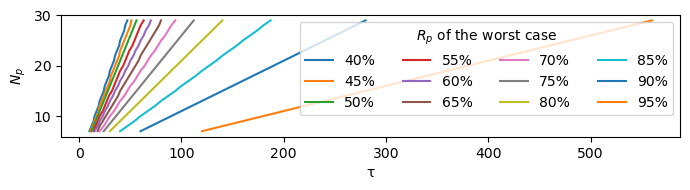

In [4]:
def findtau(Np,Rp):
    for tau in range (Np,100000):
        if Rp<=(tau-Np+1)/tau:#*(tau-1)/tau:
            return tau
    return "false"
def findaveragetau(Np,Rp,pa):
    for tau in range (Np,100000):
        if Rp<=(tau-pa)/tau:#*pow((tau-1)/tau,Np-pa):
            return tau
    return "false"
rp=[]
for Rp in range (400,990,50):
    np=[]
    tau=[]
    for Np in range (7,30):
        temp=findtau(Np,Rp/1000)
        if temp!=9999 and  temp!="false" :
            np.append(Np)
            tau.append(temp)
    #        print (Np,Rp,findtau(Np,Rp/1000))
    rp.append({"Rp":Rp,"Npandtau":{"x":np,"y":tau}})
rp1=[]
for Rp in range (700,990,50):
    np=[]
    tau=[]
    for Np in range (7,30):
        temp=findaveragetau(Np,Rp/1000,int(Np*0.33))
        if temp!=9999 and  temp!="false" :
            np.append(Np)
            tau.append(temp)
    #        print (Np,Rp,findtau(Np,Rp/1000))
    rp1.append({"Rp":Rp,"Npandtau":{"x":np,"y":tau}})
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(7, 2)) 

fig1 = plt.subplot(111)
for a in rp:
    plt.plot((a["Npandtau"])["y"],(a["Npandtau"])["x"], label=str(int(a["Rp"]/10))+"%")
    print ((a["Npandtau"])["x"],(a["Npandtau"])["y"])
plt.xlabel("τ")
plt.ylabel("${N_p}$")
#fig2= plt.subplot(212)
#for a in rp1:
#    plt.plot((a["Npandtau"])["y"],(a["Npandtau"])["x"], label=str(int(a["Rp"]/10))+"%")
#    print ((a["Npandtau"])["x"],(a["Npandtau"])["y"])
#plt.xlabel("τ (considering $R_p$ with $a=P_a × N_p$)")
#plt.ylabel("${N_p}$")
plt.legend(loc='upper right',title="$R_p$ of the worst case",ncol=4)
fig.tight_layout()
print(findtau(15,0.40))
print(findtau(15,0.70))
print(findtau(15,0.75))
print(findtau(15,0.80))
print(findtau(15,0.85))
print(findtau(15,0.90))
print(findtau(15,0.95))
fig.savefig("./fig/tau.pdf")

(436, 147.18042813455656, 76.90691489361703)
(386, 166.2452504317789, 68.55019946808511)
60.19348404255321
51.83676861702128
43.48005319148935
35.12333776595745
26.766622340425528
18.409906914893625


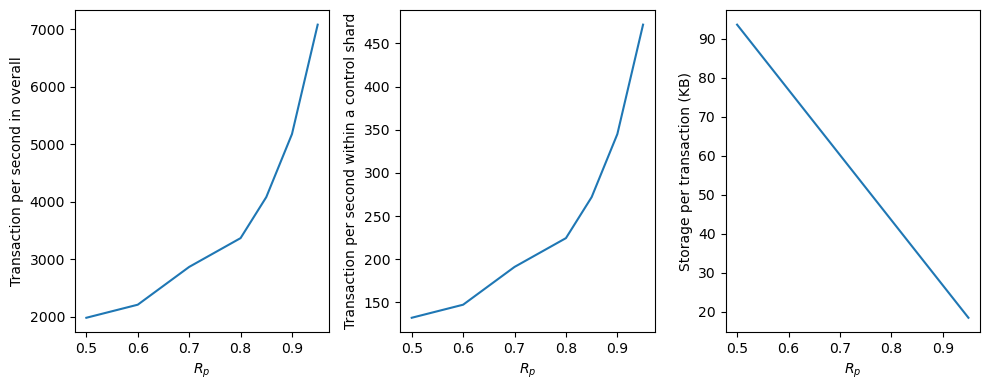

In [5]:
def performance(Rp):
    T1=86
    lumda=50
    Nc=329
    Np=21
    T2=lumda*int((Nc/Np)*(1-Rp)+1)
    Etime=T1+T2
    ETx=4096*(Nc/Np)
    Eblock=int(Nc/Np)
    Bs=2048 #2mb
    Stx=(((Bs+256)*Nc)*(1-Rp)+Bs*Np*Rp)*int(Nc/Np)/(ETx)
    return Etime,ETx/Etime, Stx
print(performance(0.6))
print(performance(0.65))
print(performance(0.70)[2])
print(performance(0.75)[2])
print(performance(0.80)[2])
print(performance(0.85)[2])
print(performance(0.90)[2])
print(performance(0.95)[2])
Throughput=[performance(0.5)[1],performance(0.6)[1],performance(0.70)[1],performance(0.80)[1],performance(0.85)[1],performance(0.90)[1],performance(0.95)[1]]
Throughput1=[performance(0.5)[1]*15,performance(0.6)[1]*15,performance(0.70)[1]*15,performance(0.80)[1]*15,performance(0.85)[1]*15,performance(0.90)[1]*15,performance(0.95)[1]*15]

Storage=[performance(0.5)[2],performance(0.60)[2],performance(0.70)[2],performance(0.80)[2],performance(0.85)[2],performance(0.90)[2],performance(0.95)[2]]
X=[0.5,0.6,0.7,.80,.85,.90,.95]
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(10, 4)) 

fig1 = plt.subplot(132)
plt.plot(X,Throughput)
plt.xlabel("$R_p$")
plt.ylabel("Transaction per second within a control shard")
fig2= plt.subplot(133)
plt.plot(X,Storage)
plt.xlabel("$R_p$")
plt.ylabel("Storage per transaction (KB)")
fig3= plt.subplot(131)
plt.plot(X,Throughput1)
plt.xlabel("$R_p$")
plt.ylabel("Transaction per second in overall")
fig.tight_layout()
fig.savefig("./fig/comparison_rapidchain.pdf")

##  Setting up the shard size

In [2]:
import math

"""Function find_processshard used for find the process shard size:(we use this function in section 5.1's Parameters for Process shard) )
    Input:
        pa:Proportion of adversarial nodes in the system (upper bound), from 0 to 0.33.
        pf:The maximum failure rate that can be tolerated, entered as x, means that minus x times of 10 can be tolerated, for example input 7 means the biggest failure rate is 10^-7.
        
    Output:
        n: The minimum process shard size that satisfies the condition.
"""
def find_processshard(pa,pf):
    n=0
    while pb**n>=10**(-pa):
        n+=1
    return n

"""Function find_processshard used for find the control shard size:(we use this function in section 5.1's Parameters for Control shard)
    Input:
        pa:Proportion of adversarial nodes in the system (upper bound), from 0 to 0.33.
        pf:The maximum failure rate that can be tolerated, entered as x, means that minus x times of 10 can be tolerated, for example input 7 means the biggest failure rate is 10^-7.
        
    Output:
        n: The minimum control shard size that satisfies the condition.
"""
def find_controlshard(pa,pf):
    Nc = 3
    i = math.ceil(0.5 * Nc)
    sum = 1
    while sum >= 10**(-pf):
        sum = 0
        for j in range(i, Nc):
            sum += math.comb(Nc, j) * (pa**j) * ((1-pa)**(Nc-j))
        Nc += 1
        i = math.ceil(0.5 * Nc)
    return Nc-1

"""Function find_generalsize used for find the shard size in general condition:(we use this function in finding gearbox's shard size)
    Input:
        pa:Proportion of adversarial nodes in the system (upper bound), from 0 to 0.33.
        pf:The maximum failure rate that can be tolerated, entered as x, means that minus x times of 10 can be tolerated, for example input 7 means the biggest failure rate is 10^-7.
        Liveness: The Liveness threshold of the shard(from 0 to 1).
    Output:
        n: The minimum shard size that satisfies the condition.
"""
def find_generalsize(pa,pf,Livness):
    Nc = 15
    i = math.ceil((1-Livness) * Nc)
    sum = 1
    while sum >= 10**(-pf):
        sum = 0
        for j in range(i, Nc):
            sum += math.comb(Nc, j) * (pa**j) * ((1-pa)**(Nc-j))
        Nc += 1
        i = math.ceil((1-Livness) * Nc)
    return Nc-1

"""Function findshardsize used for find the shard size in given pf threshold:(we use this function in section 5.1's Determining 𝑃𝑓 𝑝 and 𝑃𝑓 𝑐 )
    Input:
        num: the number of nodes in the whole system
    Output:
        cs: the array of control shard size that satisfies different pf (from 10^-5 to 10^-10).
        ps: the array of process shard size that satisfies different pf (from 10^-5 to 10^-10).
"""
def findshardsize(num):
    index=[]
    ps=[]
    cs=[]
    for j in range(5,10):
        for i in range(0,15):
            if (10**(-i))*math.floor(N/find_Nf(0.33,i))+((10**(-i))*math.floor(N/find_Nc(i,0.33)))<10**(-j):
                print((10**(-i))*math.floor(N/find_Nf(0.33,i))+((10**(-i))*math.floor(N/find_Nc(i,0.33))))
                index.append(j)
                ps.append(find_Nf(0.33,i))
                cs.append(find_Nc(i,0.33))
                break
    return cs,ps

In [6]:
find_generalsize(0.01,2,0.5)

15